In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston


# EDA

In [22]:
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
bd=pd.DataFrame(boston['data'])
bd.columns = boston['feature_names']
bd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


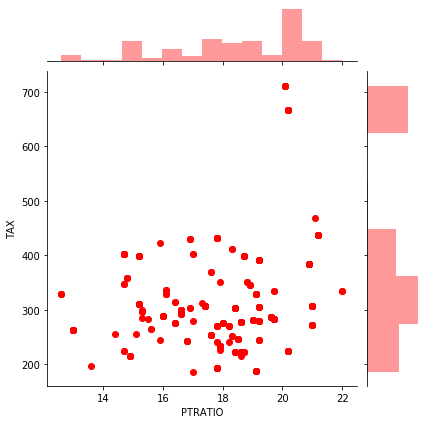

In [37]:
sns.jointplot(x='PTRATIO',y='TAX',data=bd,color='red')

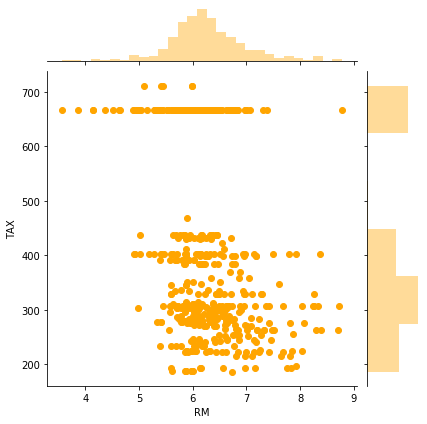

In [30]:
sns.jointplot(x='RM',y='TAX',data=bd,color='orange')

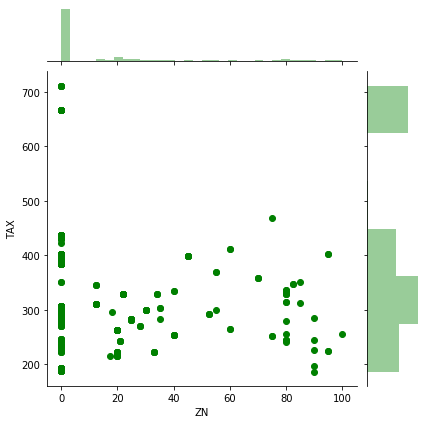

In [32]:
sns.jointplot(x='ZN',y='TAX',data=bd,color='Green')

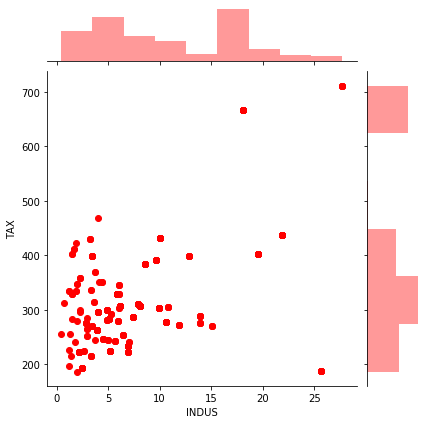

In [33]:
sns.jointplot(x='INDUS',y='TAX',data=bd,color='blue')

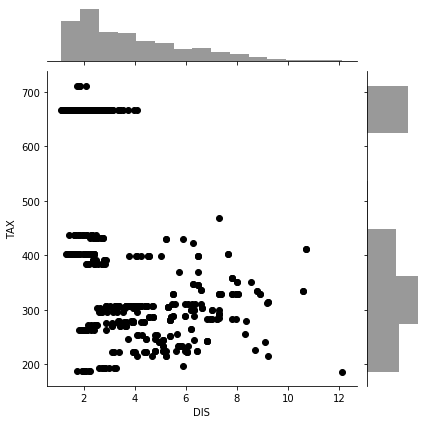

In [36]:
sns.jointplot(x='DIS',y='TAX',data=bd,color='black')

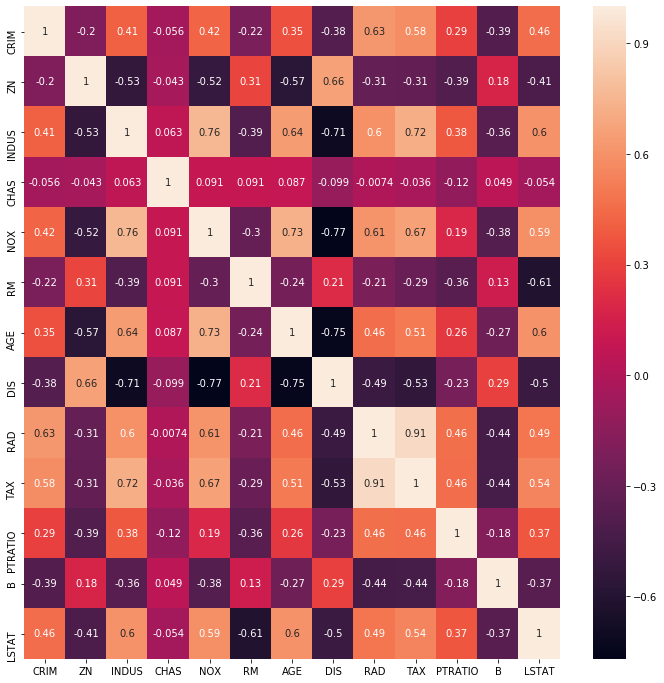

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(bd.corr(),annot=True)

# Building the Linear Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lm = LinearRegression()

In [45]:
X = bd.drop(['TAX','B','LSTAT','RAD','NOX','CHAS','AGE'],axis = 1)
y = bd['TAX']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=47)

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
coeff=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
coeff

,Coeff
CRIM,4.883051
ZN,1.477057
INDUS,13.717949
RM,10.101724
DIS,-10.573575
PTRATIO,19.544846


In [61]:
predictions = lm.predict(X_test)

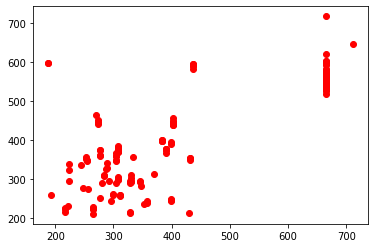

In [86]:
plt.scatter(y_test,predictions, color='red')

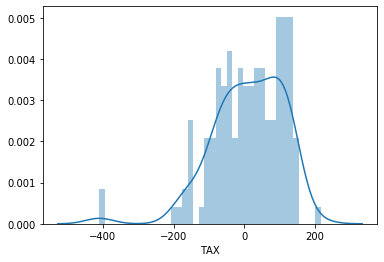

In [65]:
sns.distplot((y_test-predictions),bins=40)

In [88]:
from sklearn import metrics

In [97]:
print('R Square',metrics.r2_score(y_test, predictions ))
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

R Square 0.6232699080323163
MAE:  80.48552896284686
MSE:  10191.983754758492
RMSE:  100.95535525547167
